# Tutorial 5: Automatic Curve Fitting

Developed by Megan Renz for Cornell Physics Labs.

Fitting data by hand can be fun, but scientists fairly rarely do this in real life (anymore).   

Before, we were looking for the values of the slope and intercept that gave us the smallest $\chi^2$ given the data. This sounds like a minimization problem! We want the computer to do what you were doing with the sliders in the manual fitting task.  

For linear fits, we can use simple derivatives to find the values of the slope and intercept that minimize the $\chi^2$. (For a derivation of these expressions, see J.R. Taylor, "An Introduction to Error Analysis", Section 8.2.)

As an example, let's say you did an experiment where you stretched a rubber band to 6 different extensions, 5 times each.  

So, you have measurements that look like:  

| Extension (cm) | Force Trial 1 (N) | Trial 2 (N) |  Trial 3 (N) |  Trial 4 (N) |  Trial 5 (N) | 
| --- | --- | --- | --- | --- | --- | 
| 1.0 |  1.03  | 1.147|  0.934 | 1.049 | 0.924| 
| 2.0 | 1.91 |  2.178 | 2.127 | 2.005  |1.963| 
| 3.0 | 3.065 | 3.107 | 3.099 | 3.135 | 3.089| 
| 4.0 | 3.98  | 3.983 | 4.003 | 4.07  | 4.055| 
| 5.0 | 5.041  |4.892 | 4.949|  5.055  |4.955| 
| 6.0 | 5.896  |6.066 | 5.89 |  6.136 | 6.08| 


You want to figure out how well Hooke's law describes the rubber band for the data that you took.  In order to do that, you are going to plot the data and fit a line to the points, just like in the manual fit.  However, this time, the computer is going to figure out the best fit slope and intercept for you!  

This might seem like a difficult problem.  Do not worry, we do not expect you to derive any of this or write very much code.  To help you, we wrote a function that you can call to give you the best-fitting slope and intercept and give you graphs you can explore just like in the manual fitting tutorial.  This function (called autoFit) is available in a file called 

<span style= 'font-family:Courier'>utilities.ipynb<span style= 'font-family:Courier'>

(if you do not have utilities.ipynb downloaded, download it now and put it in the same directory this file is in.)

By running <span style= 'font-family:Courier'>%run ./utilities.ipynb</span>, we are running the file where the autoFit function is defined so that you can use it in your notebook.  

Then, we run <span style= 'font-family:Courier'>help(autoFit)</span> to get an explaination on how it works.  We will walk through the most useful parts of the functionality later in the tutorial.  




In [2]:
%run ./utilities.ipynb
help(autoFit)

Help on function autoFit in module __main__:

autoFit(x=[], y=[], dy=[], title='Use title= in your call', xaxis='Use xaxis= in your call', yaxis='Use yaxis= in your call', function=<function linear at 0x7fe2c41904c0>, guess=[0, 1], n=10, movePoints=False, sliders=False, path='')
    Function:  autoFit
    
    This function is meant to be very all-purpose for fitting your data using chi-squared.  
    
    In order to call it, use autoFit(put your arguments here).  
    
    There are a number of options you can use to input your data.
    
    1.  If you call the function with autoFit(x=1-d vector containing the x values of your data, y=1-d array containing the y values of your data, and dy= 1-d array containing the uncertainties)
        then you will get plots with the fitted lines, chi-squared value, and the residuals graph.  
    
    
    2.  If you call the function with autoFit(n=number of points), then the function will auto-populate some data, and assume you want boxes to use

Now that we have the autoFit function available, let's try it out:  

To make your life easier, the autoFit function can take in an array of y data that has multiple trials per row and then calculate the uncertainties and means for you.

| Extension (cm) | Force Trial 1 (N) | Trial 2 (N) |  Trial 3 (N) |  Trial 4 (N) |  Trial 5 (N) | 
| --- | --- | --- | --- | --- | --- | 
| 1.0 |  1.03  | 1.147|  0.934 | 1.049 | 0.924| 
| 2.0 | 1.81 |  2.178 | 2.127 | 2.005  |1.963| 
| 3.0 | 3.265 | 3.107 | 3.499 | 3.135 | 2.889| 
| 4.0 | 3.7  | 3.983 | 4.003 | 4.07  | 4.055| 
| 5.0 | 5.041  |4.892 | 4.949|  5.055  |4.955| 
| 6.0 | 5.896  |6.366 | 5.89 |  6.136 | 6.08| 

(this is the same table as above, just reprinted for easier reference)
 

### 1. a) Enter in the data in the variables $x$ and $y$ in the code cell below and then run the code block.

In [3]:
x=[1.0,2.0,3.0,4.0,5.0,6.0]
y=[[1.03, 1.147, 0.934, 1.049, 0.924], 
   [1.81, 2.178, 2.127, 2.005, 1.963],
   [3.265, 3.107, 3.499, 3.135, 2.889],
   [3.7, 3.983, 4.003, 4.07, 4.055],
   [5.041, 4.892, 4.949, 5.055, 4.955],
   [5.896, 6.366, 5.89, 6.136, 6.08]]


x=np.array(x)
y=np.array(y)

### b)  Fill in the title, $x$ axis labels, and $y$ axis labels by filling in the corresponding ... in the function call.  

Calculated Uncertainties:  
[0.0366774  0.05794107 0.08966962 0.06035853 0.02732266 0.07865957]


<IPython.core.display.Javascript object>


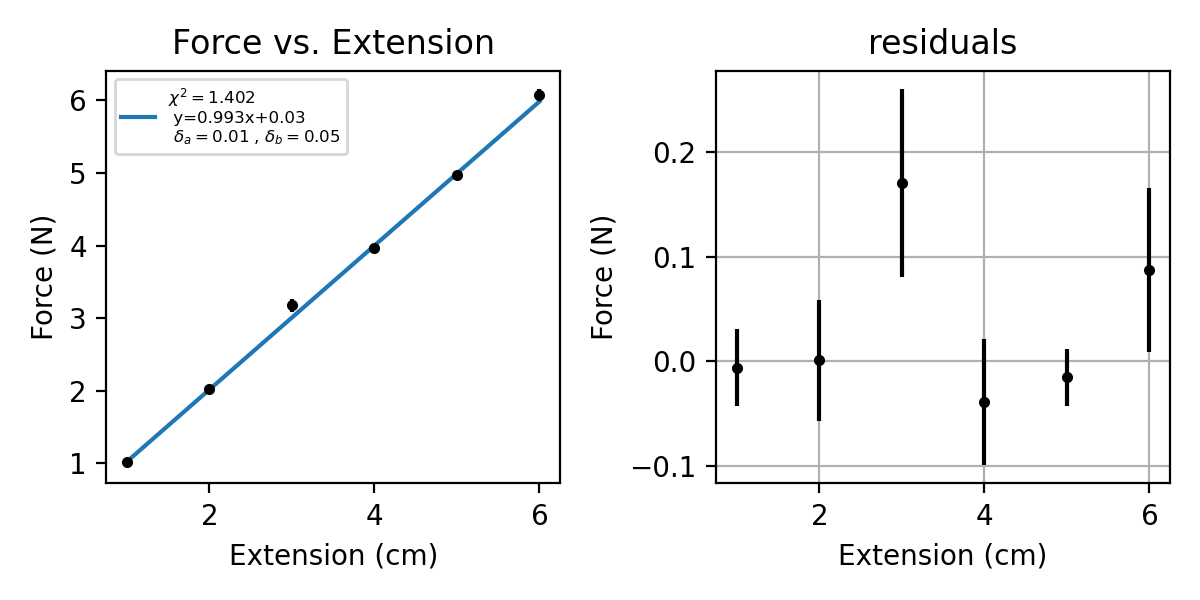

interactive(children=(FloatSlider(value=0.03039000497398736, description='intercept', max=1.3039000497398736, …

In [4]:
autoFit(x=x, y=y,  title="Force vs. Extension", xaxis="Extension (cm)", yaxis="Force (N)" )

The best fit slope and intercept, along with $\chi^2$ are listed on the graph. The $\delta$s are the uncertainties in the slope and intercept.   Checking "fit" means the line will automatically snap to the best fit line (and the sliders won't do anything). Unchecking "fit" allows you to manually change the fit line to compare different fit parameters.

Now we can find the best slope and intercept automatically! 

### 2. What are the best fit slope and intercept?  What are the uncertainties in the slope ($\delta_a$) and intercept ($\delta_b$)?  
**ANSWER:** The best slope is $0.99$, the best intercept is $0.03$, and the best uncertainties are $\delta_a=0.01$ and $\delta_b=0.05$

### 3. What is $\chi^2$ at the best fit slope and intercept? 
**ANSWER:**  $\chi^2=1.402$

### 4. Does it appear that Hooke's Law describes your rubber band so far?  
**ANSWER:** Yes, that Hooke's Law is describing the rubber band since the fit matches the data.

### 5. Try unchecking "fit" in order to move the sliders.  How much can you change the slope before the $\chi^2$ is no longer small? How much can you change the intercept before the $\chi^2$ is no longer small?  Does this agree with the uncertainties?  
**ANSWER:** I could only vary the slope by ~0.02 while maintaining a low $\chi^2$, which matches the uncertainty factor from the fit. I could vary the intercept by ~0.06 while maintaining a low $\chi^2$, which also matches the uncertainty factor from the fit.

Let's explore that last question a bit.  You can move points around after drawing the graph if you call the autoFit function with the argument <span style= 'font-family:Courier'>movePoints=True</span>. Try calling the function again in the cell below, filling in the ...  It may take a second to finish drawing.   Now you can change the values of the points!  Try increasing the uncertainties on all of the points to .5. 

Calculated Uncertainties:  
[0.0366774  0.05794107 0.08966962 0.06035853 0.02732266 0.07865957]


<IPython.core.display.Javascript object>


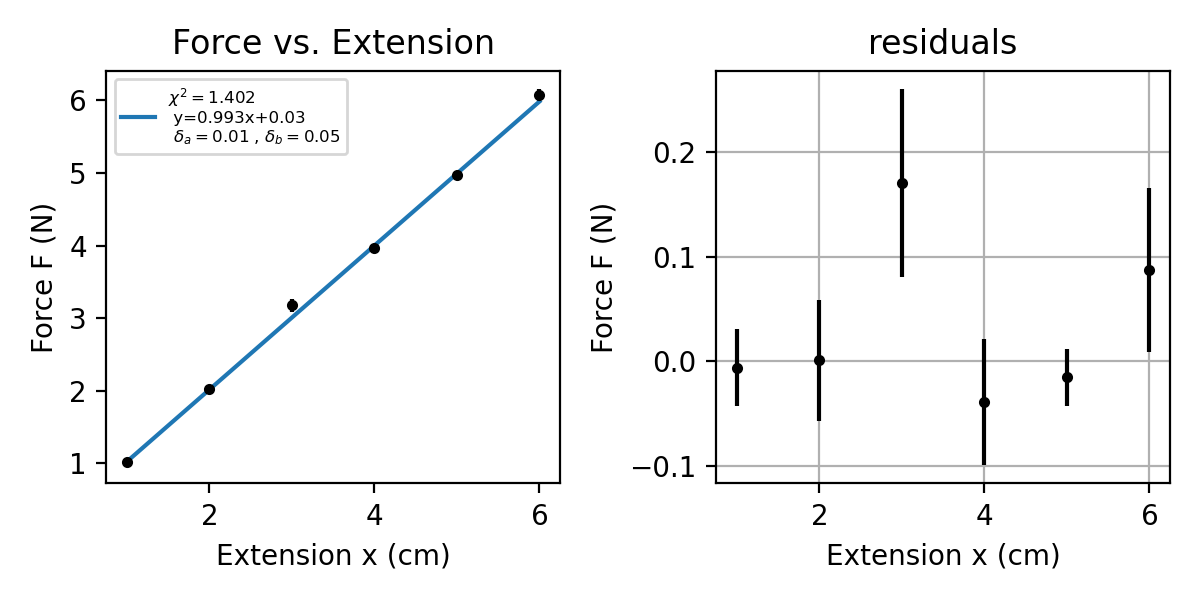

interactive(children=(FloatSlider(value=0.03039000497398736, description='intercept', max=1.3039000497398736, …

datapoint: 1


interactive(children=(Text(value='1.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='1.0168000000000001', description='y_i'), Output()), _dom_classes=('widget-in…

interactive(children=(Text(value='0.03667740448832223', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 2


interactive(children=(Text(value='2.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='2.0166000000000004', description='y_i'), Output()), _dom_classes=('widget-in…

interactive(children=(Text(value='0.05794107351439042', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 3


interactive(children=(Text(value='3.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='3.179', description='y_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='0.08966961581271554', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 4


interactive(children=(Text(value='4.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='3.9622', description='y_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='0.060358528809108636', description='dy_i'), Output()), _dom_classes=('widget…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 5


interactive(children=(Text(value='5.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='4.978399999999999', description='y_i'), Output()), _dom_classes=('widget-int…

interactive(children=(Text(value='0.027322664584553204', description='dy_i'), Output()), _dom_classes=('widget…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 6


interactive(children=(Text(value='6.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='6.073600000000001', description='y_i'), Output()), _dom_classes=('widget-int…

interactive(children=(Text(value='0.07865957030139434', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

In [5]:
autoFit(x=x, y=y, title="Force vs. Extension", xaxis="Extension x (cm)", yaxis="Force F (N)", movePoints=True )

### 6. What happens to $\chi^2$ when you increase the uncertainties on the points?
**ANSWER:** Increasing the uncertainties on the points decreases the $\chi^2$ value.

### 7. What happens to the uncertainties in the slope and intercept when you increase the uncertainties on the points?  
**ANSWER:** The uncertainties in the slope and intercept also decrease when the uncertainties in the points is increased.

Let's say you keep taking data for the rubber band, but you increase the extensions.  

| Extension (cm) | Force Trial 1 (N) | Trial 2 (N) |  Trial 3 (N) |  Trial 4 (N) |  Trial 5 (N) | 
| --- | --- | --- | --- | --- | --- | 
| 1.0 |  1.03  | 1.147|  0.934 | 1.049 | 0.924| 
| 2.0 | 1.81 |  2.178 | 2.127 | 2.005  |1.963| 
| 3.0 | 3.265 | 3.107 | 3.499 | 3.135 | 2.889| 
| 4.0 | 3.7  | 3.983 | 4.003 | 4.07  | 4.055| 
| 5.0 | 5.041  |4.892 | 4.949|  5.055  |4.955| 
| 6.0 | 5.896  |6.366 | 5.89 |  6.136 | 6.08|
| 7.0 | 7.064|  7.03  | 7.087 | 7.073 | 7.06| 
| 8.0 |  9.841 | 9.676 | 9.837 | 9.946 | 9.86 | 
| 9.0 | 13.019| 12.861 |12.932 |13.332 |13.071| 

### 8. Fill in $x$ and $y$ again including the new data, and try plotting the data below, using <span style= 'font-family:Courier'>movePoints=True</span>.    


Calculated Uncertainties:  
[0.0366774  0.05794107 0.08966962 0.06035853 0.02732266 0.07865957
 0.00842568 0.0391009  0.07220139]


<IPython.core.display.Javascript object>


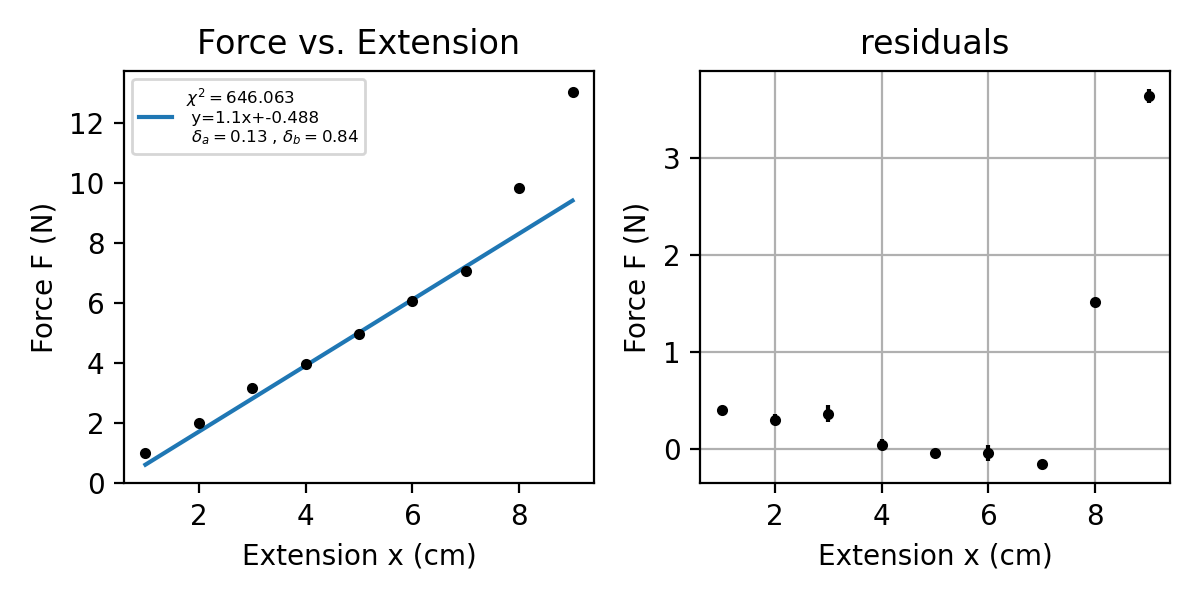

interactive(children=(FloatSlider(value=-1.048779357414495, description='intercept', max=-1.048779357414495, m…

datapoint: 1


interactive(children=(Text(value='1.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='1.0168000000000001', description='y_i'), Output()), _dom_classes=('widget-in…

interactive(children=(Text(value='0.03667740448832223', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 2


interactive(children=(Text(value='2.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='2.0166000000000004', description='y_i'), Output()), _dom_classes=('widget-in…

interactive(children=(Text(value='0.05794107351439042', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 3


interactive(children=(Text(value='3.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='3.179', description='y_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='0.08966961581271554', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 4


interactive(children=(Text(value='4.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='3.9622', description='y_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='0.060358528809108636', description='dy_i'), Output()), _dom_classes=('widget…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 5


interactive(children=(Text(value='5.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='4.978399999999999', description='y_i'), Output()), _dom_classes=('widget-int…

interactive(children=(Text(value='0.027322664584553204', description='dy_i'), Output()), _dom_classes=('widget…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 6


interactive(children=(Text(value='6.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='6.073600000000001', description='y_i'), Output()), _dom_classes=('widget-int…

interactive(children=(Text(value='0.07865957030139434', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 7


interactive(children=(Text(value='7.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='7.0628', description='y_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='0.008425675047140096', description='dy_i'), Output()), _dom_classes=('widget…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 8


interactive(children=(Text(value='8.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='9.831999999999999', description='y_i'), Output()), _dom_classes=('widget-int…

interactive(children=(Text(value='0.03910089513041861', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

datapoint: 9


interactive(children=(Text(value='9.0', description='x_i'), Output()), _dom_classes=('widget-interact',))

interactive(children=(Text(value='13.043000000000001', description='y_i'), Output()), _dom_classes=('widget-in…

interactive(children=(Text(value='0.07220138502826662', description='dy_i'), Output()), _dom_classes=('widget-…

interactive(children=(Checkbox(value=True, description='include_in_fit'), Output()), _dom_classes=('widget-int…

In [6]:
x=[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0]
y=[[1.03  , 1.147,  0.934 , 1.049 , 0.924], 
   [1.81,2.178,2.127,2.005,1.963],
   [3.265,3.107,3.499,3.135,2.889],
   [3.7,3.983,4.003,4.07,4.055],
   [5.041,4.892,4.949,5.055,4.955],
   [5.896,6.366,5.89,6.136,6.08],
   [7.064,7.03,7.087,7.073,7.06],
   [9.841, 9.676, 9.837, 9.946, 9.86],
   [13.019, 12.861, 12.932, 13.332, 13.071]]


x=np.array(x)
y=np.array(y)
autoFit(x=x, y=y, title="Force vs. Extension", xaxis="Extension x (cm)", yaxis="Force F (N)", movePoints=True)

### 9. Now what is $\chi^2$ and what does this say about whether Hooke's Law is descriptive of the rubber band for all the extensions?   
**ANSWER:** The $\chi^2$ has increased to 646.063, indicating that Hooke's Law is completely failing at these longer extensions. This implies that Hooke's Law only applied for small extensions.

### 10. Uncheck boxes to include only some of the points in the fit.  For which region of the graph does the rubber band appear to follow Hooke's Law?
**ANSWER:** Removing the final two points brings the $\chi^2$ back down to a reasonable number. This implies that Hooke's Law applies for extensions $1<x<7$.

If you have already calculated the uncertainties or determined them some other way, you can give autoFit a list of means for y rather than a 2D matrix.

### 11. Give an example of a measurement you could do where you should not use repeated measurements to determine the uncertainty in y. 

**ANSWER:** When measurements don't have a consistent value (a random variable for example), taking repeated measurements doesn't give information to determine the uncertainty in $y$.

You can set the uncertainties manually by including dy= in the autoFit call.  For example:  


<IPython.core.display.Javascript object>


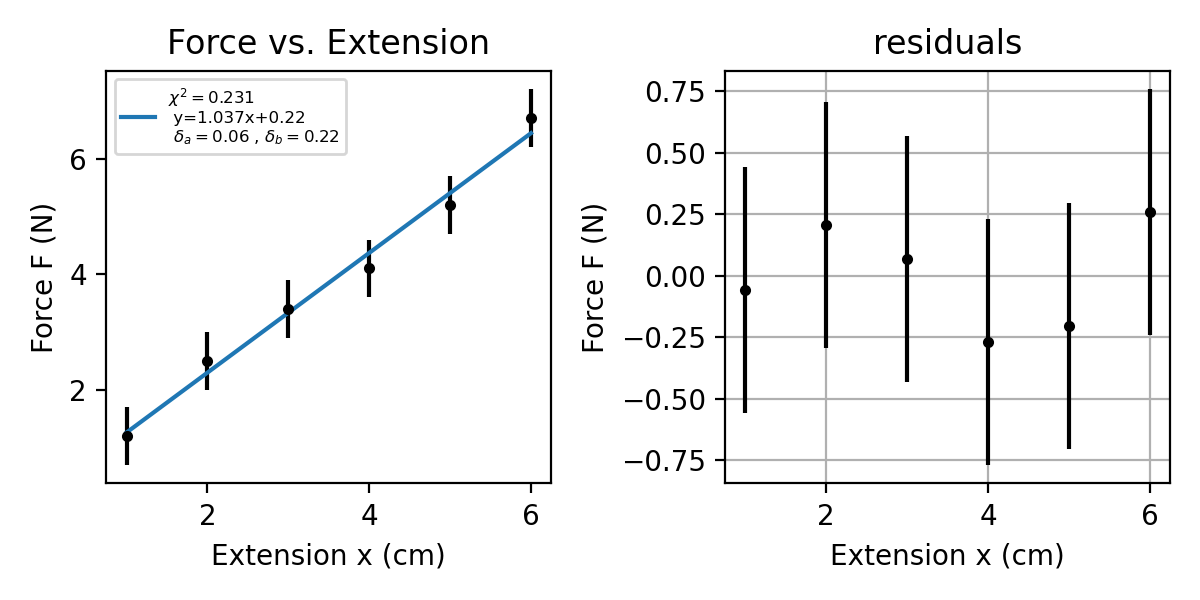

interactive(children=(FloatSlider(value=0.2199999999982989, description='intercept', max=3.199999999982989, mi…

In [7]:
x=[1,2,3,4,5,6]
y=[1.2,2.5, 3.4, 4.1, 5.2, 6.7]
dy=[.5,.5,.5,.5,.5,.5] 
x=np.array(x)
y=np.array(y)
dy=np.array(dy)
autoFit(x,y,dy=dy,title="Force vs. Extension", xaxis="Extension x (cm)", yaxis="Force F (N)" )

Finally, you can input your data as a csv file.  
Download the example file "example.csv" and put it in the same folder this tutorial is in.   Take a look at it.  

The first column is the $x$ values, the second is the $y$ values, and the third is the $dy$ (uncertainty in $y$) values.  

You can give autoFit this csv file using the argument <span style= 'font-family:Courier'>path="\path\to\example.csv"</span>.

If the csv file is in the same folder, you can just use <span style= 'font-family:Courier'>path="example.csv"</span>.


### 12. Run the code below.  What are the best fit slope and intercept? 
**ANSWER:** The best fit slope is 0.548 and the best fit intercept is 3.083. 

using data from: example.csv
x: 
[0 1 2 3 4 5 6 7]
y: 
[3 4 5 6 2 5 7 8]
uncertainties: 
[1 1 1 1 1 1 1 1]


<IPython.core.display.Javascript object>


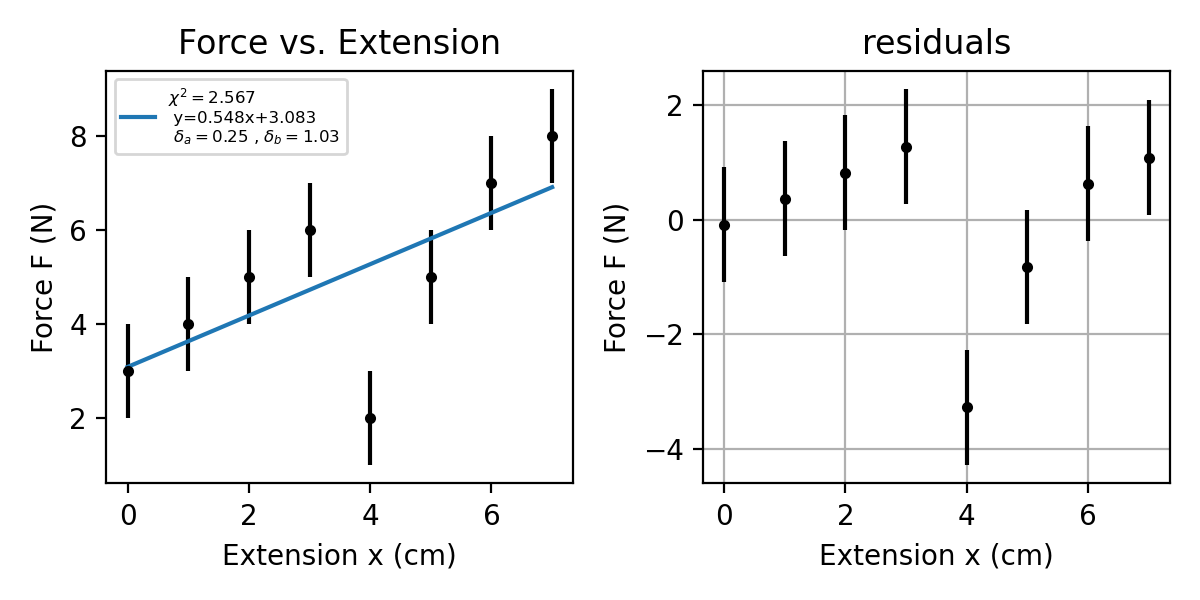

interactive(children=(FloatSlider(value=3.0833333333378765, description='intercept', max=31.833333333378764, m…

In [8]:
autoFit(path="example.csv",title="Force vs. Extension", xaxis="Extension x (cm)", yaxis="Force F (N)")

You can use this method to input your data in the future.  It is important that you follow exactly the same format as the instructions in this tutorial, or else the function will not work.  

When you want to use this <span style= 'font-family:Courier'>autoFit</span> function in the future, just run the line <span style= 'font-family:Courier'>%run ./utilities.ipynb</span> and then use the argument combination that fits your use case.

The <span style= 'font-family:Courier'>utilities.ipynb</span> file also allows you to use some of the functions from previous tutorials: <span style= 'font-family:Courier'>standard_deviation()</span>, <span style= 'font-family:Courier'>standard_unc_of_mean()</span>, and <span style= 'font-family:Courier'>t_prime()</span>. When you do your own data analysis on your lab data, the utilities file can be a very useful resource. You can also run the <span style= 'font-family:Courier'>help()</span> function on these other functions.


In [9]:
t_prime(1.2,.1, 1.4, .1)

1.4142135623730945

In [10]:
help(standard_deviation)
help(standard_unc_of_mean)
help(t_prime)
help(autoFit)

Help on function t_prime in module __main__:

t_prime(A, dA, B, dB)
    Returns the value of t prime. Requires 4 arguments in this order: measurement A, uncertainty of measurement A, measurent B, uncertainty of measurement B.



Save your notebook with all your answers to the questions, modified code cells, and output from each code cell. Submit your notebook by uploading it to the Gradescope assignment.